In [1]:
import pandas as pd, numpy as np
import os, shutil
from glob import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Back, Style
sns.set(style='dark')

In [2]:
dataset_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset'

In [3]:
df = pd.read_csv(f'{dataset_dir}/csv/dicom_info.csv')
df['image_path'] = df.image_path.apply(lambda x: x.replace('CBIS-DDSM', dataset_dir))
df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
def show_img(path):
    img = cv2.imread(path,0)
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap='bone')

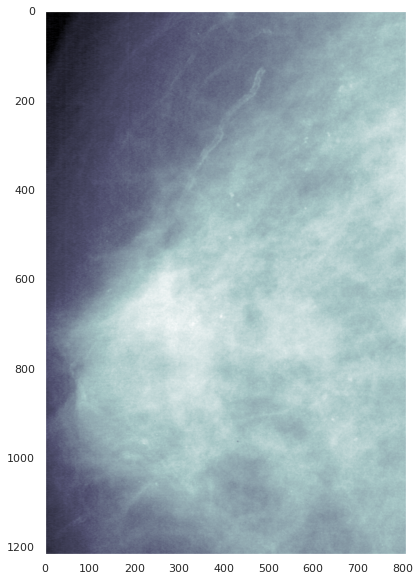

In [5]:
show_img(df.image_path.iloc[10])

# Image Size Extraction
same as `df.Rows` or `df.Columns`

In [6]:
%%time
import imagesize
data = df['image_path'].map(lambda path: imagesize.get(path))
width, height = list(zip(*data))
df['width'] = width
df['height'] = height
# df.head()

CPU times: user 2.05 s, sys: 5.48 s, total: 7.53 s
Wall time: 1min 26s


# Width and Height Distribution

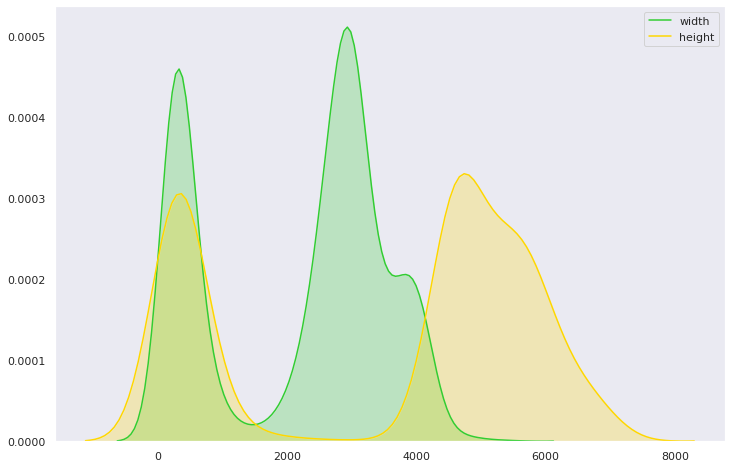

In [7]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['width'], shade=True, color='limegreen')
sns.kdeplot(df['height'], shade=True, color='gold')
plt.legend(['width','height'])

# Aspect Ratio

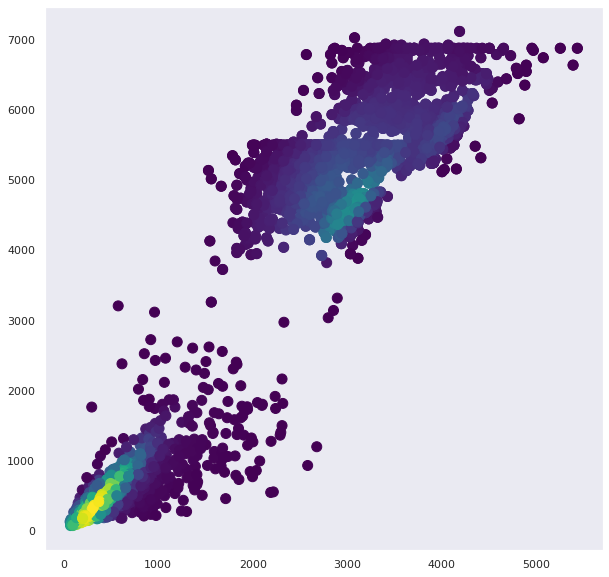

In [8]:
from scipy.stats import gaussian_kde


x_val = df.width.values
y_val = df.height.values

# Calculate the point density
xy = np.vstack([x_val,y_val])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize = (10, 10))
# ax.axis('off')
ax.scatter(x_val, y_val, c=z, s=100, cmap='viridis')
# ax.set_xlabel('x_mid')
# ax.set_ylabel('y_mid')
plt.show()

# One Row

In [9]:
for info in zip(df.iloc[0].index, df.iloc[0]):
    print(f'{Fore.GREEN}{info[0]}{Style.RESET_ALL}:',info[1])

file_path: CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm
image_path: /kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
AccessionNumber: nan
BitsAllocated: 16
BitsStored: 16
BodyPartExamined: BREAST
Columns: 351
ContentDate: 20160426
ContentTime: 131732.685
ConversionType: WSD
HighBit: 15
InstanceNumber: 1
LargestImagePixelValue: 65535
Laterality: R
Modality: MG
PatientBirthDate: nan
PatientID: Mass-Training_P_01265_RIGHT_MLO_1
PatientName: Mass-Training_P_01265_RIGHT_MLO_1
PatientOrientation: MLO
PatientSex: nan
PhotometricInterpretation: MONOCHROME2
PixelRepresentation: 0
ReferringPhysicianName: nan
Rows: 289
SOPClassUID: 1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID: 1.3.6.1.4.1.9590.100.1.2.426380754911844882201419900442081103076
SamplesPerPixel: 1
SecondaryCaptureDeviceManufacturer: MathWorks
SecondaryCaptureDeviceManufacturerModelName: MATLAB
SeriesDescription:

# Types of Images

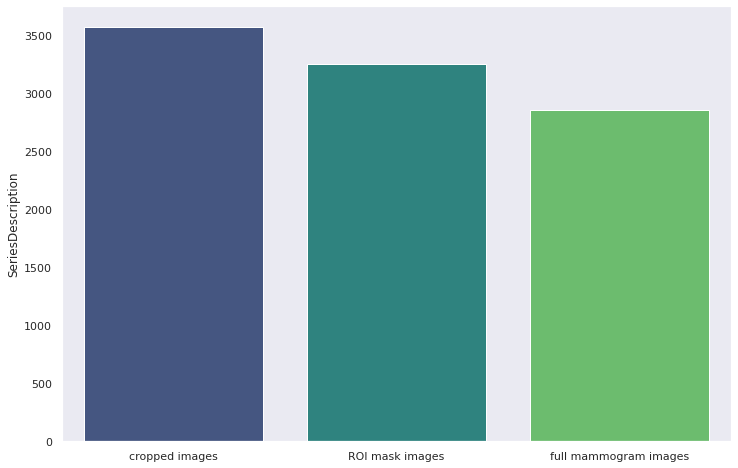

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(df.SeriesDescription.value_counts(dropna=False).index, df.SeriesDescription.value_counts(dropna=False), palette='viridis')
#.plot.bar(rot=0, color=['deepskyblue', 'royalblue', 'deeppink'])

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

def show_grid(files, row=3, col=3):
    grid_files = random.sample(files, row*col)
    images     = []
    for image_path in tqdm(grid_files):
        img          = cv2.resize(cv2.imread(image_path), dsize=(512,512))
        images.append(img)

    fig = plt.figure(figsize=(col*5, row*5))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(col, row),  # creates 2x2 grid of axes
                     axes_pad=0.05,  # pad between axes in inch.
                     )

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

# Cropped

100%|██████████| 12/12 [00:00<00:00, 237.02it/s]


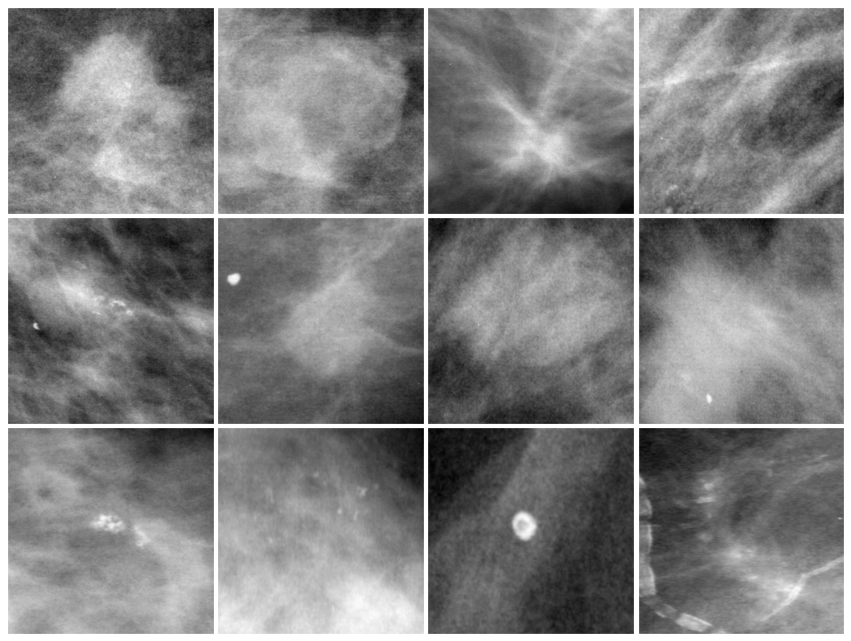

In [12]:
show_grid(df[df.SeriesDescription=='cropped images'].image_path.tolist(), row=4)

# Full Mammogram

100%|██████████| 12/12 [00:02<00:00,  5.80it/s]


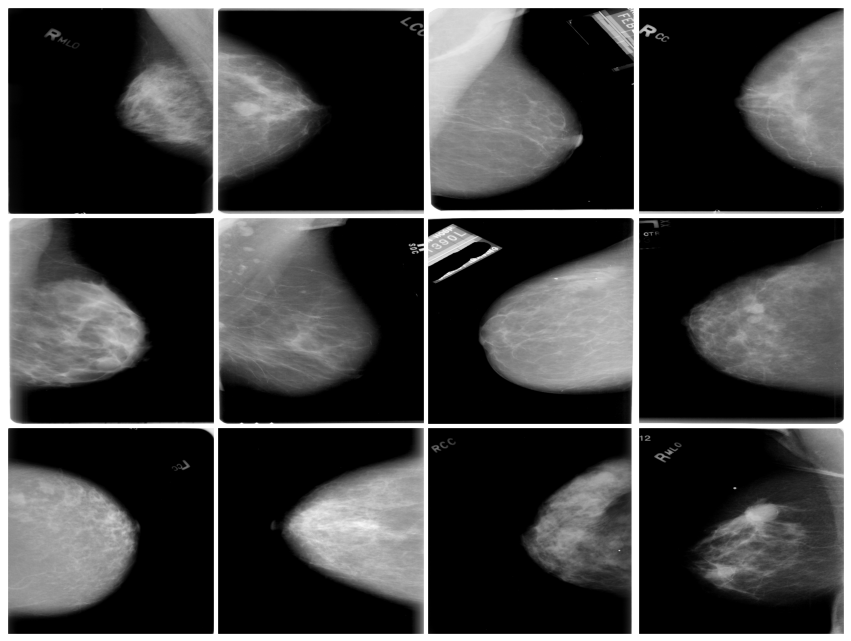

In [13]:
show_grid(df[df.SeriesDescription=='full mammogram images'].image_path.tolist(), row=4)

# ROI mask

100%|██████████| 12/12 [00:01<00:00,  7.64it/s]


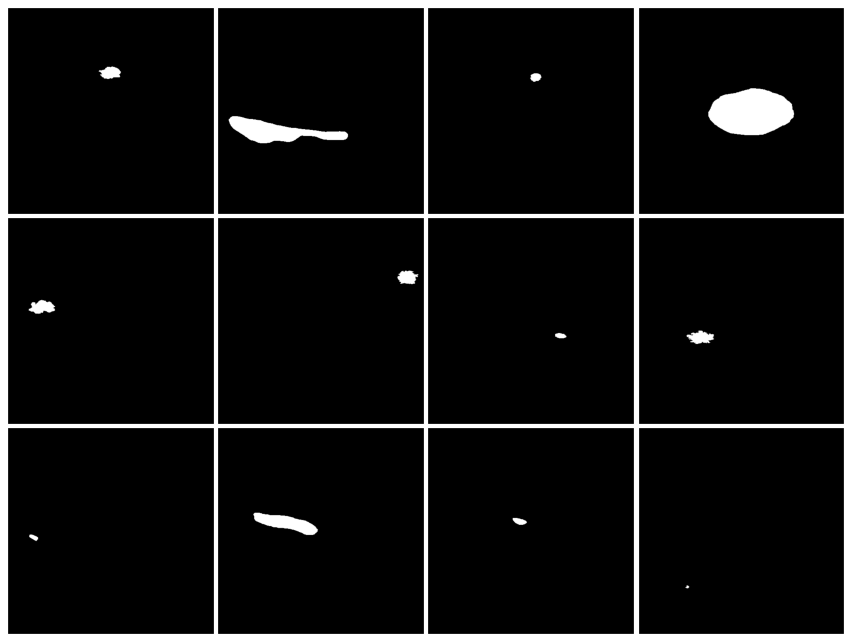

In [14]:
show_grid(df[df.SeriesDescription=='ROI mask images'].image_path.tolist(), row=4)

# None

100%|██████████| 12/12 [00:01<00:00,  8.67it/s]


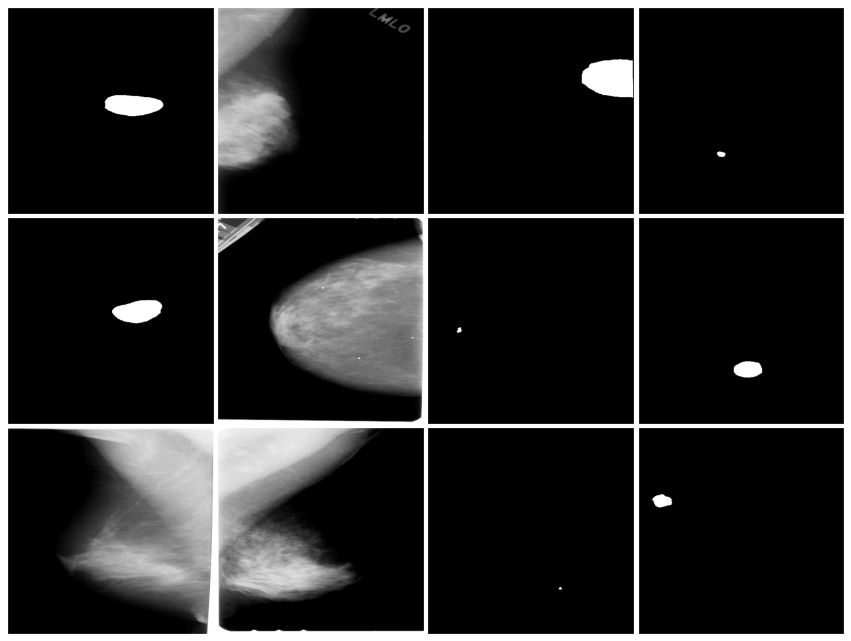

In [15]:
show_grid(df[df.SeriesDescription.isna()].image_path.tolist(), row=4)